In [112]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import datetime
from datetime import datetime

In [113]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [114]:
df = pd.read_csv('raw_brunei_tweets_tweepy.csv')

In [115]:
df.head()

,id,text,user,user_followers,favorite_count,retweet_count,location,datetime
0,1534787184922087425,where do you buy The Ordinary products in brunei,heartthrobb606,101,0,0,ldh,2022-06-09 06:39:14+00:00
1,1534786365296377857,RT @ChartsBright: Worldwide Trends &amp; in Ot...,bvc_vachi,217,0,182,NaN,2022-06-09 06:35:59+00:00
2,1534786051826278400,@MrPotatoheadPHD List of countries in which ci...,P_Odrowaz,150,0,0,NaN,2022-06-09 06:34:44+00:00
3,1534784860048736256,@Fullmetalfat @hanasatouu Lmao both of u are f...,kaso_Izumi,52,0,0,Hydaelyn,2022-06-09 06:30:00+00:00
4,1534784546734211072,RT @ChartsBright: Worldwide Trends &amp; in Ot...,art_pwnasp,75,0,182,NaN,2022-06-09 06:28:45+00:00


In [116]:
df.shape

(7713, 8)

In [117]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7713 entries, 0 to 7712
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   id              7713 non-null   int64 
 1   text            7713 non-null   object
 2   user            7713 non-null   object
 3   user_followers  7713 non-null   int64 
 4   favorite_count  7713 non-null   int64 
 5   retweet_count   7713 non-null   int64 
 6   location        3647 non-null   object
 7   datetime        7713 non-null   object
dtypes: int64(4), object(4)
memory usage: 482.2+ KB


Creating datetime object as datetime

In [118]:
df["datetime"] = pd.to_datetime(df["datetime"])

In [119]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7713 entries, 0 to 7712
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype              
---  ------          --------------  -----              
 0   id              7713 non-null   int64              
 1   text            7713 non-null   object             
 2   user            7713 non-null   object             
 3   user_followers  7713 non-null   int64              
 4   favorite_count  7713 non-null   int64              
 5   retweet_count   7713 non-null   int64              
 6   location        3647 non-null   object             
 7   datetime        7713 non-null   datetime64[ns, UTC]
dtypes: datetime64[ns, UTC](1), int64(4), object(3)
memory usage: 482.2+ KB


In [120]:
hours= []
for i in range(df.shape[0]):
  hour= df["datetime"][i].hour
  hours.append(hour)
df["hours"] = hours

In [121]:
df.head()

,id,text,user,user_followers,favorite_count,retweet_count,location,datetime,hours
0,1534787184922087425,where do you buy The Ordinary products in brunei,heartthrobb606,101,0,0,ldh,2022-06-09 06:39:14+00:00,6
1,1534786365296377857,RT @ChartsBright: Worldwide Trends &amp; in Ot...,bvc_vachi,217,0,182,NaN,2022-06-09 06:35:59+00:00,6
2,1534786051826278400,@MrPotatoheadPHD List of countries in which ci...,P_Odrowaz,150,0,0,NaN,2022-06-09 06:34:44+00:00,6
3,1534784860048736256,@Fullmetalfat @hanasatouu Lmao both of u are f...,kaso_Izumi,52,0,0,Hydaelyn,2022-06-09 06:30:00+00:00,6
4,1534784546734211072,RT @ChartsBright: Worldwide Trends &amp; in Ot...,art_pwnasp,75,0,182,NaN,2022-06-09 06:28:45+00:00,6


In [122]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7713 entries, 0 to 7712
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype              
---  ------          --------------  -----              
 0   id              7713 non-null   int64              
 1   text            7713 non-null   object             
 2   user            7713 non-null   object             
 3   user_followers  7713 non-null   int64              
 4   favorite_count  7713 non-null   int64              
 5   retweet_count   7713 non-null   int64              
 6   location        3647 non-null   object             
 7   datetime        7713 non-null   datetime64[ns, UTC]
 8   hours           7713 non-null   int64              
dtypes: datetime64[ns, UTC](1), int64(5), object(3)
memory usage: 542.4+ KB


In [123]:
df.describe()

,id,user_followers,favorite_count,retweet_count,hours
count,7.713000e+03,7.713000e+03,7713.000000,7713.000000,7713.000000
mean,1.533347e+18,1.321106e+04,2.440944,288.427460,10.527421
std,9.941574e+14,2.688394e+05,66.234674,2018.942728,6.521613
min,1.531686e+18,0.000000e+00,0.000000,0.000000,0.000000
25%,1.532378e+18,6.200000e+01,0.000000,12.000000,4.000000
50%,1.533661e+18,2.540000e+02,0.000000,169.000000,12.000000
75%,1.534312e+18,7.000000e+02,0.000000,363.000000,15.000000
max,1.534787e+18,1.334003e+07,5528.000000,173671.000000,23.000000


In [124]:
df.isnull().sum()

id                   0
text                 0
user                 0
user_followers       0
favorite_count       0
retweet_count        0
location          4066
datetime             0
hours                0
dtype: int64

there are lot of null values in locarion so lets drop the column

Checkin for duplicates

In [125]:
df.duplicated().sum()

0

In [126]:
df.drop(["location"],axis=1,inplace=True)
df.head()

,id,text,user,user_followers,favorite_count,retweet_count,datetime,hours
0,1534787184922087425,where do you buy The Ordinary products in brunei,heartthrobb606,101,0,0,2022-06-09 06:39:14+00:00,6
1,1534786365296377857,RT @ChartsBright: Worldwide Trends &amp; in Ot...,bvc_vachi,217,0,182,2022-06-09 06:35:59+00:00,6
2,1534786051826278400,@MrPotatoheadPHD List of countries in which ci...,P_Odrowaz,150,0,0,2022-06-09 06:34:44+00:00,6
3,1534784860048736256,@Fullmetalfat @hanasatouu Lmao both of u are f...,kaso_Izumi,52,0,0,2022-06-09 06:30:00+00:00,6
4,1534784546734211072,RT @ChartsBright: Worldwide Trends &amp; in Ot...,art_pwnasp,75,0,182,2022-06-09 06:28:45+00:00,6


Counting number of characters,words and sentences

In [127]:
df["num_characters"] = df["text"].apply(len)
df['num_words'] = df["text"].apply(lambda x:len(nltk.word_tokenize(x)))
df["num_sentences"] = df["text"].apply(lambda x:len(nltk.sent_tokenize(x)))
df.head()

,id,text,user,user_followers,favorite_count,retweet_count,datetime,hours,num_characters,num_words,num_sentences
0,1534787184922087425,where do you buy The Ordinary products in brunei,heartthrobb606,101,0,0,2022-06-09 06:39:14+00:00,6,48,9,1
1,1534786365296377857,RT @ChartsBright: Worldwide Trends &amp; in Ot...,bvc_vachi,217,0,182,2022-06-09 06:35:59+00:00,6,144,26,1
2,1534786051826278400,@MrPotatoheadPHD List of countries in which ci...,P_Odrowaz,150,0,0,2022-06-09 06:34:44+00:00,6,140,21,1
3,1534784860048736256,@Fullmetalfat @hanasatouu Lmao both of u are f...,kaso_Izumi,52,0,0,2022-06-09 06:30:00+00:00,6,112,25,2
4,1534784546734211072,RT @ChartsBright: Worldwide Trends &amp; in Ot...,art_pwnasp,75,0,182,2022-06-09 06:28:45+00:00,6,144,26,1


In [128]:
from wordcloud import WordCloud
wc = WordCloud(width=500,height=500,min_font_size=10,background_color='white')

counting unique users

In [129]:
len(df["user"].unique())

4693

Number of unique dates

In [130]:
len(df["datetime"].unique())

7478

In [131]:
len(df["hours"].unique())

24

Number of tweets happing in particular hour

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


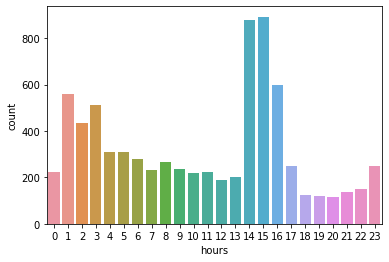

In [132]:
sns.countplot('hours',data=df)

In [133]:
df_new =  df.sort_values(by=["user_followers"])
df_new = df[["user","user_followers"]][:10]

In [134]:
df_new.shape

(10, 2)

In [135]:
df_new

,user,user_followers
0,heartthrobb606,101
1,bvc_vachi,217
2,P_Odrowaz,150
3,kaso_Izumi,52
4,art_pwnasp,75
5,winlin131,109
6,hanlnalnal,48
7,baboomercedez,81
8,gabriell9a,36
9,Allkimhanvc,104


user having most followers

In [136]:
maximum_index = df["user_followers"].idxmax()
maximum_user  = df["user_followers"].max()
name = df["user"][maximum_index]
print(f"User having maximum followers is {name} with {maximum_user} users")

User having maximum followers is CGTNOfficial with 13340026 users


##Text Preprocessing

1.   Lower Case
2.   Tokenization
3.   Removing Special Characters
4.   Removing stop words and punctuation
5.   Stemming 



In [137]:
from nltk.corpus import stopwords
import string
from nltk.stem.porter import PorterStemmer

In [138]:
ps =PorterStemmer()

In [139]:
def transform_text(text):
  text = text.lower()
  text = nltk.word_tokenize(text)

  y = []
  for i in text:
    if i.isalnum():
      y.append(i)
  
  text = y[:]
  y.clear()

  for i in text:
    if i not in stopwords.words('english') and i not in string.punctuation:
      y.append(i)

  text = y[:]
  y.clear()

  for i in text:
    y.append(ps.stem(i))

  return " ".join(y)


In [140]:
transform_text('HI, How are YOU, are you going to $$$ party!!')

'hi go parti'

In [141]:
df['transformed_text'] = df['text'].apply(transform_text)

In [142]:
#generating the most used words in 
spam_wc = wc.generate(df['transformed_text'].str.cat(sep=" "))

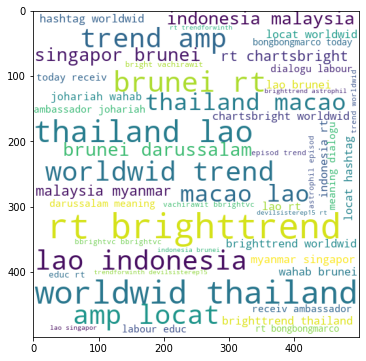

In [143]:
plt.figure(figsize=(15,6))
plt.imshow(spam_wc)

Getting the most common words

In [144]:
corpus = []
for msg in df['transformed_text'].tolist():
   words = msg.split()
   for word in words:
     corpus.append(word)
print(corpus[:10])
print(len(corpus))

['buy', 'ordinari', 'product', 'brunei', 'rt', 'chartsbright', 'worldwid', 'trend', 'amp', 'locat']
86433


In [145]:
from collections import Counter

In [146]:
tf = Counter(corpus)

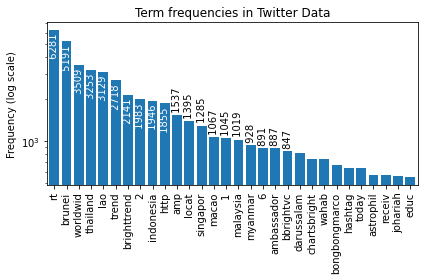

In [147]:
x = [tag for tag,count in tf.most_common(30)]
y = [count for tag,count in tf.most_common(30)]


plt.bar(x, y)
plt.title("Term frequencies in Twitter Data")
plt.ylabel("Frequency (log scale)")
plt.yscale('log') # optionally set a log scale for the y-axis
plt.xticks(rotation=90)
for i, (tag, count) in enumerate(tf.most_common(20)):
    plt.text(i, count, f' {count} ', rotation=90,
             ha='center', va='top' if i < 10 else 'bottom', color='white' if i < 10 else 'black')
plt.xlim(-0.6, len(x)-0.4) # optionally set tighter x lims
plt.tight_layout() # change the whitespace such that all labels fit nicely
plt.show()